# Pandas

Pandas is a powerful Python library used for data manipulation and analysis. It provides two primary data structures:

- **Series**: A one-dimensional array-like structure.
- **DataFrame**: A two-dimensional tabular structure with rows and columns.

Pandas is widely used in data science and machine learning and in conjnctions wiht its tools for cleaning, filtering, reshaping, and merging data it allows you to view data and perform math on large sets of data.

## setup

In [4]:
!pip install pandas

In [5]:
import pandas as pd #Import the pandas library with pd alias

In [6]:
gameData = pd.read_csv ("vgsales.csv") #import iris data as dataframe
gameData.shape #print the shape of the dataframe

(16598, 11)

read_csv (like in JSON) method,  for the .csv file, and storing it in a dataframe object. 

Note: A CSV is basicly an excell sheet.

In [7]:
gameData.columns # get the column names

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
gameData.head(3) # show the first 3 rows of the data

Rank               Name Platform    Year     Genre Publisher  NA_Sales  \
0     1         Wii Sports      Wii  2006.0    Sports  Nintendo     41.49   
1     2  Super Mario Bros.      NES  1985.0  Platform  Nintendo     29.08   
2     3     Mario Kart Wii      Wii  2008.0    Racing  Nintendo     15.85   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     29.02      3.77         8.46         82.74  
1      3.58      6.81         0.77         40.24  
2     12.88      3.79         3.31         35.82

In [9]:
gameData[u'Name'].head(3) #output the first 3 rows of the Name column

0           Wii Sports
1    Super Mario Bros.
2       Mario Kart Wii
Name: Name, dtype: object

In [10]:
gameData.describe() #output the summary statistics of the data
#Take note of the missing data in rank and year
#we will use that later

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [11]:
print(gameData.info()) # get the information about the data
#Take note of the missing data in rank and year
#we will use that later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


## Analyzing the Data
Lets swich to a smaller dataset

In [12]:
music_df = pd.read_csv ("music.csv") #import iris data as dataframe
print(music_df) #print the shape of the dataframe DF is a dataframe


    age  gender      genre
0    20       1     HipHop
1    23       1     HipHop
2    25       1     HipHop
3    26       1       Jazz
4    29       1       Jazz
5    30       1       Jazz
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
9    20       0      Dance
10   21       0      Dance
11   25       0      Dance
12   26       0   Acoustic
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


### Find the Distribution of Genres

In [13]:
genre_counts = music_df['genre'].value_counts()
print(genre_counts)


genre
Classical    6
HipHop       3
Jazz         3
Dance        3
Acoustic     3
Name: count, dtype: int64


### Filter the data

In [14]:
males = music_df[music_df['gender'] == 1]
females = music_df[music_df['gender'] == 0]
print(males.head())
print(females.head())


   age  gender   genre
0   20       1  HipHop
1   23       1  HipHop
2   25       1  HipHop
3   26       1    Jazz
4   29       1    Jazz
    age  gender     genre
9    20       0     Dance
10   21       0     Dance
11   25       0     Dance
12   26       0  Acoustic
13   27       0  Acoustic


### Group Data

In [15]:
avg_age_by_genre = music_df.groupby('genre')['age'].mean() 
print(avg_age_by_genre)

genre
Acoustic     27.666667
Classical    33.500000
Dance        22.000000
HipHop       22.666667
Jazz         28.333333
Name: age, dtype: float64


In [16]:
music_df.groupby('age')['gender'].mean()

age
20    0.5
21    0.0
23    1.0
25    0.5
26    0.5
27    0.0
29    1.0
30    0.5
31    0.5
33    1.0
34    0.0
35    0.0
37    1.0
Name: gender, dtype: float64

In [17]:
music_df.groupby('genre')['gender'].mean()

genre
Acoustic     0.0
Classical    0.5
Dance        0.0
HipHop       1.0
Jazz         1.0
Name: gender, dtype: float64

In [ ]:
#will not work Why? Gender is a string and we do not need one
music_df.groupby('gender')['genre'].mean()


TypeError: agg function failed [how->mean,dtype->object]

## Sort Data

In [19]:
sorted_music = music_df.sort_values(by='age', ascending=True)
print(sorted_music.head())

    age  gender   genre
0    20       1  HipHop
9    20       0   Dance
10   21       0   Dance
1    23       1  HipHop
2    25       1  HipHop


## Visualization with pandas and matplotlib 

In [20]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


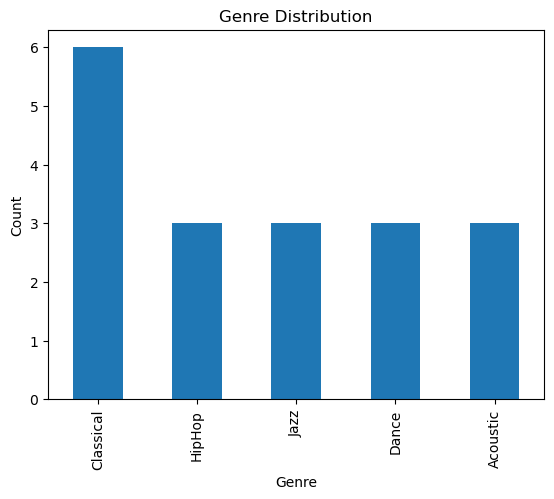

In [21]:
genre_counts.plot(kind='bar', title='Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

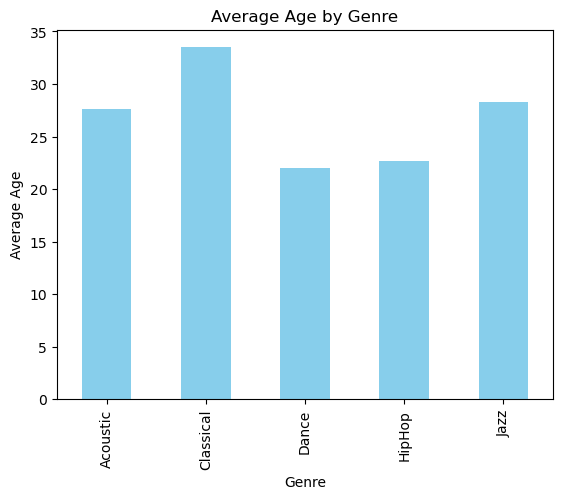

In [22]:
avg_age_by_genre.plot(kind='bar', color='skyblue', title='Average Age by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Age')
plt.show()

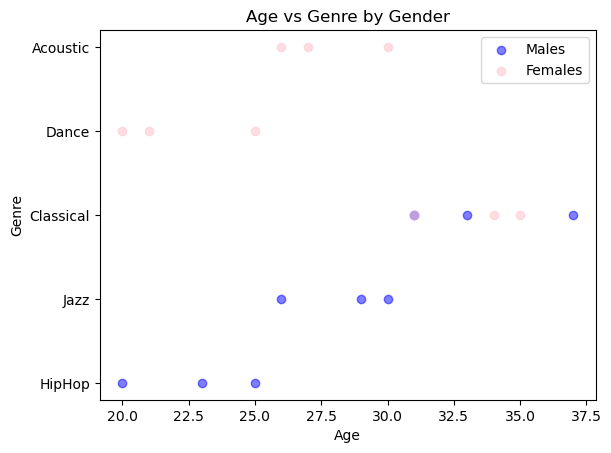

In [23]:
plt.scatter(males['age'], males['genre'], label='Males', color='blue', alpha=0.5)
plt.scatter(females['age'], females['genre'], label='Females', color='pink', alpha=0.5)
plt.title('Age vs Genre by Gender')
plt.xlabel('Age')
plt.ylabel('Genre')
plt.legend()
plt.show()


## Predictions

In [24]:
df = pd.read_csv ("music.csv") #import iris data as dataframe
print(df) #print the shape of the dataframe DF is a dataframe


    age  gender      genre
0    20       1     HipHop
1    23       1     HipHop
2    25       1     HipHop
3    26       1       Jazz
4    29       1       Jazz
5    30       1       Jazz
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
9    20       0      Dance
10   21       0      Dance
11   25       0      Dance
12   26       0   Acoustic
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


In [25]:
X = df.drop(columns=['gender']) 
#droping data does not really drop it from the table but drops it from the output talble
#by convention a capital X represents the input set 
X

age      genre
0    20     HipHop
1    23     HipHop
2    25     HipHop
3    26       Jazz
4    29       Jazz
5    30       Jazz
6    31  Classical
7    33  Classical
8    37  Classical
9    20      Dance
10   21      Dance
11   25      Dance
12   26   Acoustic
13   27   Acoustic
14   30   Acoustic
15   31  Classical
16   34  Classical
17   35  Classical

In [ ]:
#create our output set
#by convention we use y for the output set
y = df['genre']
y

# Disission trees

In [ ]:
!pip install scikit-learn 
#Sklearn is the most used populare ML library in python


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
df = pd.read_csv ("music.csv") #import iris data as dataframe
X = df.drop(columns=['genre'])
y = df['genre']
model = DecisionTreeClassifier()
X

In [ ]:
model.fit(X,y)

In [ ]:
predictions = model.predict([ [21,1] ,[22,0]])
predictions

Rememer you need 3 sets of data. Lets do that now.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test,prediction)
score

In [ ]:
df

In [ ]:
X_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8) # what do you think will be the results
model.fit(X_train,y_train)
prediction = model.predict(X_test)
score = accuracy_score(y_test,prediction)
score

# Model persistance

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib #this is a way to save the models 

df = pd.read_csv ("music.csv") #import iris data as dataframe

X = df.drop(columns=['genre'])
y = df['genre']
model = DecisionTreeClassifier()
model.fit(X,y)
joblib.dump(model, 'musik-recomender.joblib')




In [ ]:
model = joblib.load('musik-recomender.joblib')
predictions = model.predict([ [21,1]])
predictions